# W203 Homework 12 

### Submission by Abhi Sharma (abhisha@berkeley.edu)

In [1]:
install.packages("dplyr")
library(dplyr)
install.packages("car")
library(car)
install.packages("lmtest")
library(lmtest)
install.packages("sandwich")
library(sandwich)
install.packages("corrplot")
library(corrplot)
install.packages("stargazer")
library(stargazer)
install.packages("stringr")
library(stringr)
# set standard height and width for images displayed
options(repr.plot.width=5, repr.plot.height=5)

package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpMfJk8p\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpMfJk8p\downloaded_packages


Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpMfJk8p\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



package 'sandwich' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpMfJk8p\downloaded_packages


Warning message:
"package 'sandwich' was built under R version 3.6.3"

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpMfJk8p\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpMfJk8p\downloaded_packages



Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



package 'stringr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\RtmpMfJk8p\downloaded_packages


Warning message:
"package 'stringr' was built under R version 3.6.3"

In [2]:
setwd(getwd())
path = "videos.txt"
data = read.table(path, sep = "\t", header = TRUE)
head(data)

,video_id,uploader,age,category,length,views,rate,ratings,comments
,<fct>,<fct>,<int>,<fct>,<int>,<int>,<dbl>,<int>,<int>
1,9QR1tni70fo,BHJJYP,1131,Comedy,126,204,3.00,2,1
2,l1DCSqAJ740,musicalrox,1236,Music,243,1652,3.91,11,4
3,ZES_o3XYGjM,tessaceleste,1243,Entertainment,105,898,4.48,81,36
4,4I8b40cViDE,booloveswondergirls,1237,Entertainment,278,928,5.00,24,13
5,Elp6Bf0HJIM,Fizz101Productionz,1252,Comedy,26,392,1.50,8,17
6,VPuKu7aU9GY,slytherin66,1236,Entertainment,252,318,5.00,2,3


In [3]:
sapply(data, class)

video_id  uploader       age  category    length     views      rate   ratings 
 "factor"  "factor" "integer"  "factor" "integer" "integer" "numeric" "integer" 
 comments 
"integer"

In [4]:
summary(data$views)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      3     348    1454    9374    6207 1807640       9 

Seems like our dependent variable has NA values, we cannot continue with those rows. Hence, we remove them from the model

In [5]:
unique(unlist (lapply (data, function (x) which (is.na (x)))))

[1]   77  397  691 1129 1138 1226 1405 5246 8443

In [6]:
data = data[complete.cases(data), ]

In [7]:
summary(data$views)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3     348    1454    9374    6207 1807640 

In [8]:
dim(data)

[1] 9480    9

In [9]:
unlist(lapply (data$comments, function (x) which (x < 0)))

[1] 1

There is 1 row with negative value for number of comments (row # 1968), which doesnt make sense. We will remove this row as well.

In [10]:
data[1968, ]

,video_id,uploader,age,category,length,views,rate,ratings,comments
,<fct>,<fct>,<int>,<fct>,<int>,<int>,<dbl>,<int>,<int>
1975,CX3b4_QuY24,0balance0,597,Howto & Style,8,4463,3.67,3,-2


In [11]:
data = data[-1968, ]

In [12]:
unlist(lapply (data$comments, function (x) which (x < 0)))

integer(0)

In [13]:
dim(data)

[1] 9479    9

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3     348    1453    9375    6208 1807640 

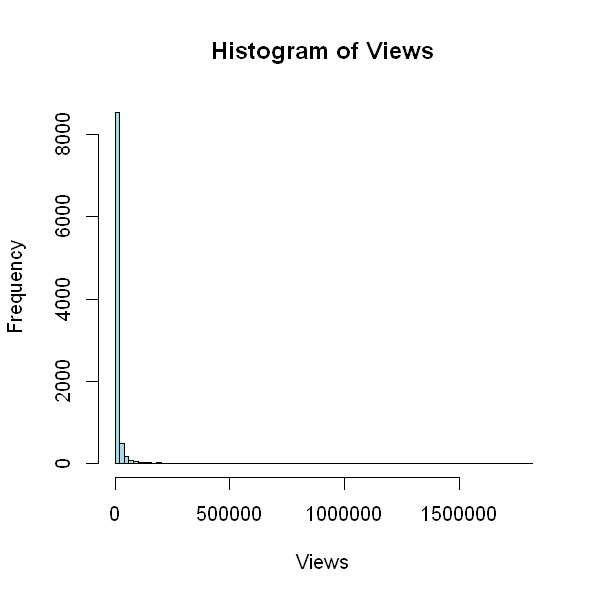

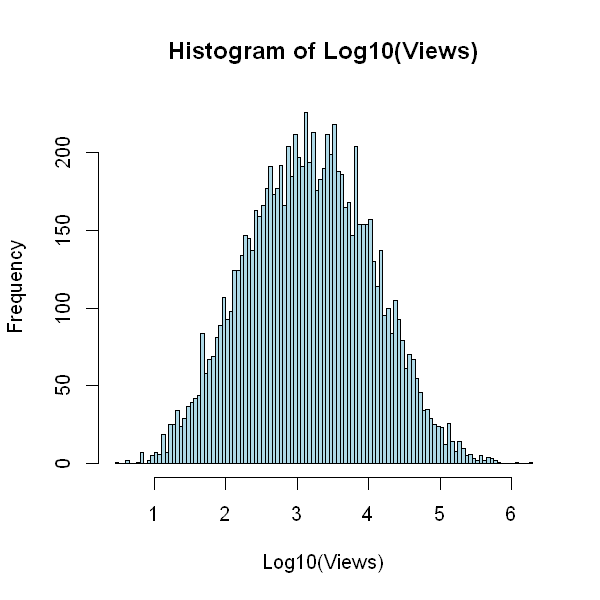

In [14]:
summary(data$views)
hist(data$views, breaks=100, main = "Histogram of Views", xlab = "Views", col = "lightblue", border = "black")
hist(log10(data$views), breaks=100, main = "Histogram of Log10(Views)", xlab = "Log10(Views)", col = "lightblue", border = "black")


We see the "range" of views is very high. Hence, we need a function to squish the extreme values so we can visualize better. Hence, we plot log10(views)

Here a value of 6 on the X axis means that the video has 1 Million views.

Thus we will use log10(views) as our target variable

In [15]:
data$log10_views = log10(data$views)

In [16]:
# ratings fall within expected 0 to 5 range
summary(data$rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.400   4.670   3.746   5.000   5.000 

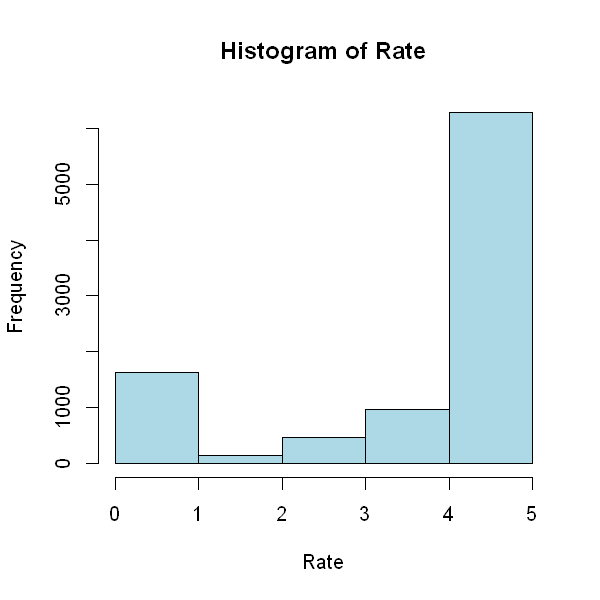

In [17]:
hist(data$rate, breaks=6, main = "Histogram of Rate", xlab = "Rate", col = "lightblue", border = "black")

As expected, users either really hate the videos or really like the videos. Hence, we see a bimodal distribution

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    5.00   20.56   15.00 3801.00 

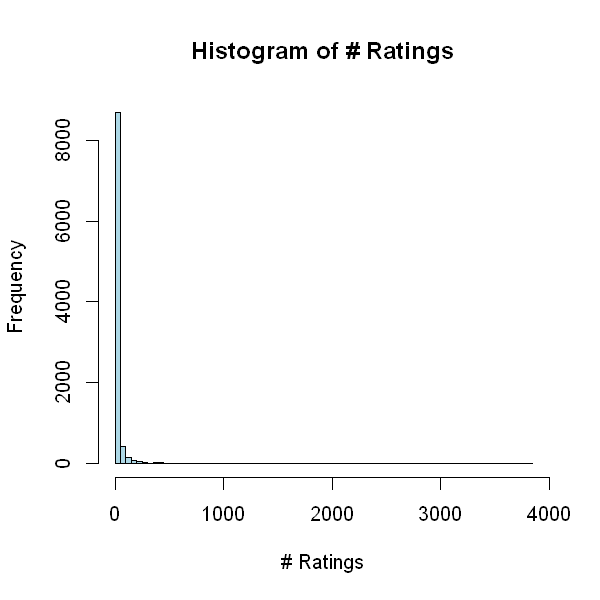

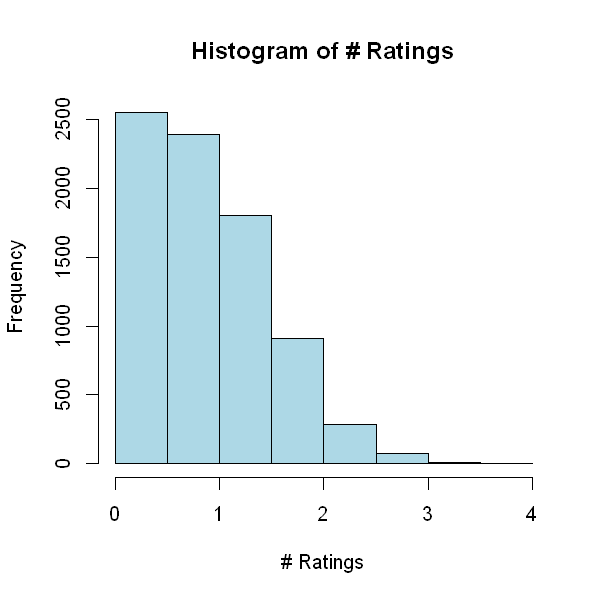

In [18]:
summary(data$ratings)
hist(data$ratings, breaks=100, main = "Histogram of # Ratings", xlab = "# Ratings", col = "lightblue", border = "black")
hist(log10(data$ratings), breaks=10, main = "Histogram of # Ratings", xlab = "# Ratings", col = "lightblue", border = "black")

As expected, there is a drop off in the number of ratings for videos. Most of the audience consumes videos passively, without giving ratings.

There are very few videos for which over 1000 users have given ratings.

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     1.00     3.00    19.85    13.00 13211.00 

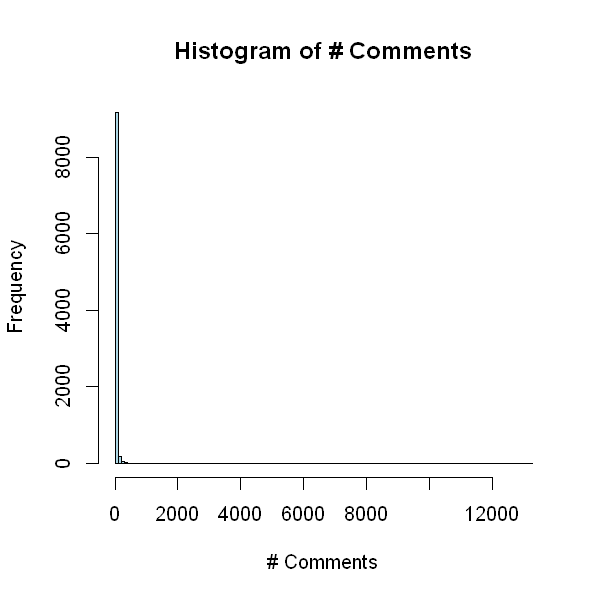

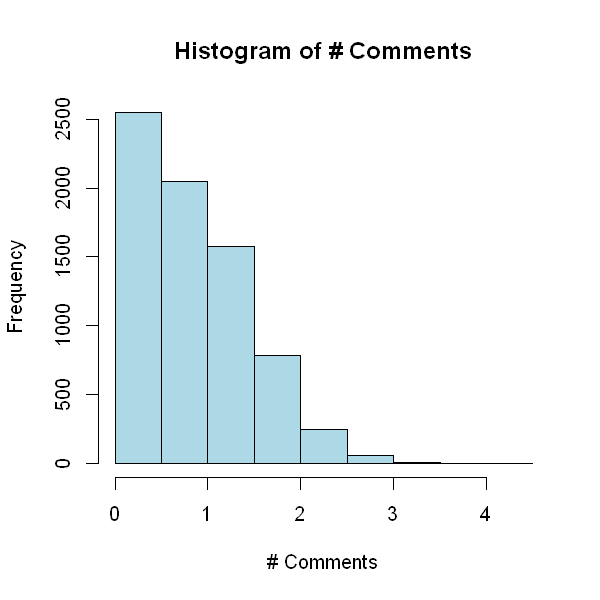

In [19]:
summary(data$comments)
hist(data$comments, breaks=100, main = "Histogram of # Comments", xlab = "# Comments", col = "lightblue", border = "black")
hist(log10(data$comments), breaks=10, main = "Histogram of # Comments", xlab = "# Comments", col = "lightblue", border = "black")

The comments follow a very similar pattern to the ratings. Most audience doesnt give comments on videos.

In [20]:
unique(data$category)

[1] Comedy                Music                 Entertainment        
 [4] Howto & Style         Travel & Events       Education            
 [7] People & Blogs        News & Politics       Sports               
[10] Film & Animation      Gaming                Science & Technology 
[13] Autos & Vehicles      Pets & Animals        Nonprofits & Activism
[16]  UNA                 
17 Levels:   UNA  Autos & Vehicles Comedy Education ... Travel & Events

**Intrinsically, rate, number of ratings and number of comments are variables that show some form of engagement and thus, could possibly determine quality of video.**

Hence, one can make the argument for including these 3 variables in the model to predict number of views based on video quality.

Video length and age of video shouldn't intrinsically determine video quality. Hence, we will exclude these from our model. There can be age old classics that are as popular as new viral videos. There could also be 1 hour long videos (say concerts) as popular as short videos.

Category of video is an interesting property, in so far as determining which category of videos get the highest views / comments / engagement. However, it would be unfair to compare videos of the "Music" category, with say videos from the "Comedy" category. The right thing to do would be to conduct a category wise regression for video quality against number of views. Note that category is not "ordinal" - there is no inherent order between video categories, so we cannot assign number values to this variable.

This regression by category would be something worth exploring (via a one hot encoded vectors for categories). The result of this would be multiple regression lines with "jumps" due to different intercepts for each category. For each row, only 1 category will be valid, so it will belong to 1 of the N category regression lines.

Hence, **we will also include category as a one hot encoded variable in our model.** This will impact our degrees of freedom because we are introducing additional variables (16 categories) in our model, however, it doesn't affect our coefficients much (for OLS estimator t-test) because we have large number of rows!

2.309630,3.00,2,1,1131,126
3.218010,3.91,11,4,1236,243
2.953276,4.48,81,36,1243,105
2.967548,5.00,24,13,1237,278
2.593286,1.50,8,17,1252,26
2.502427,5.00,2,3,1236,252


$r
       [,1]   [,2]   [,3]  [,4]  [,5]   [,6]
[1,]  1.000 -0.180 -0.087 0.044 -0.48 -0.087
[2,] -0.180  1.000  0.410 0.086  0.38  0.130
[3,] -0.087  0.410  1.000 0.017  0.17  0.046
[4,]  0.044  0.086  0.017 1.000  0.12  0.160
[5,] -0.480  0.380  0.170 0.120  1.00  0.430
[6,] -0.087  0.130  0.046 0.160  0.43  1.000

$p
        [,1]    [,2]    [,3]    [,4]    [,5]    [,6]
[1,] 0.0e+00 1.1e-72 3.2e-17 1.7e-05 0.0e+00 2.9e-17
[2,] 1.1e-72 0.0e+00 0.0e+00 4.1e-17 0.0e+00 1.7e-36
[3,] 3.2e-17 0.0e+00 0.0e+00 9.8e-02 2.2e-63 8.3e-06
[4,] 1.7e-05 4.1e-17 9.8e-02 0.0e+00 2.3e-33 2.9e-54
[5,] 0.0e+00 0.0e+00 2.2e-63 2.3e-33 0.0e+00 0.0e+00
[6,] 2.9e-17 1.7e-36 8.3e-06 2.9e-54 0.0e+00 0.0e+00

$sym
                
[1,] 1          
[2,]   1        
[3,]   . 1      
[4,]       1    
[5,] . .     1  
[6,]         . 1
attr(,"legend")
[1] 0 ' ' 0.3 '.' 0.6 ',' 0.8 '+' 0.9 '*' 0.95 'B' 1


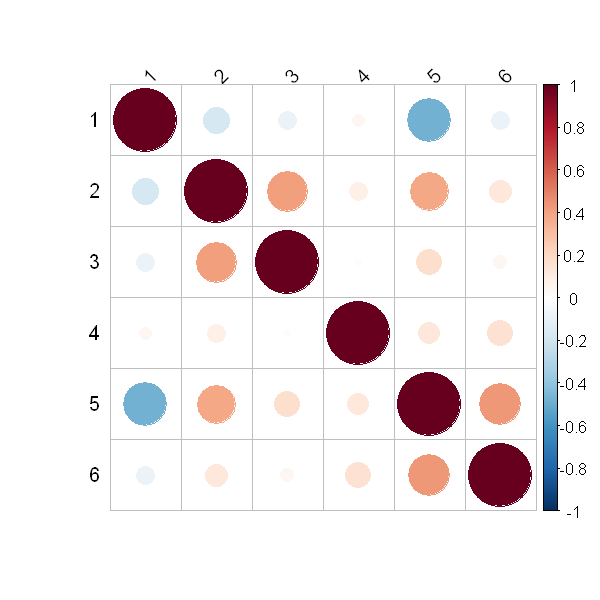

In [21]:
cordata = cbind(log10(data$views), data$rate, data$ratings, data$comments, data$age, data$length)
head(cordata)
source("http://www.sthda.com/upload/rquery_cormat.r")
rquery.cormat(cordata, type="full")

From the correlation plot, we observe a few things:
1. Medium positive correlation between views and rate
2. Medium positive correlation between views and ratings
3. Medium positive correlation between ratings and comments

This shows that higher views (popular videos) are associated with higher average rates.

Higher views (popular videos) are associated with more engagement (number of users leaving a rating).

Higher the engagement (number of users leaving a rating), higher the number of comments left on the video. Its likely that someone who rates a video will also leave a comment to express their approval (or disapproval) of the video.

We do see a negative correlation between views and age of the video, ie, older videos are viewed less.

However, we still think its not appropriate to judge video quality by age.

In [22]:
for(unique_value in unique(data$category))
{
    catg = str_replace_all(unique_value, " ", "")
    catg = str_replace_all(catg, "&", "_")
    data[paste("cat", catg, sep = "_")] = ifelse(data$category == unique_value, 1, 0)
}

In [23]:
dim(data)

[1] 9479   26

In [24]:
sapply(data, class)

video_id                uploader                     age 
               "factor"                "factor"               "integer" 
               category                  length                   views 
               "factor"               "integer"               "integer" 
                   rate                 ratings                comments 
              "numeric"               "integer"               "integer" 
            log10_views              cat_Comedy               cat_Music 
              "numeric"               "numeric"               "numeric" 
      cat_Entertainment         cat_Howto_Style       cat_Travel_Events 
              "numeric"               "numeric"               "numeric" 
          cat_Education        cat_People_Blogs       cat_News_Politics 
              "numeric"               "numeric"               "numeric" 
             cat_Sports      cat_Film_Animation              cat_Gaming 
              "numeric"               "numeric"               "numeric" 
 cat_Science_Technology      cat_Autos_Vehicles        cat_Pets_Animals 
              "numeric"               "numeric"               "numeric" 
cat_Nonprofits_Activism                 cat_UNA 
              "numeric"               "numeric"

In [25]:
head(data[, 11:26])

,cat_Comedy,cat_Music,cat_Entertainment,cat_Howto_Style,cat_Travel_Events,cat_Education,cat_People_Blogs,cat_News_Politics,cat_Sports,cat_Film_Animation,cat_Gaming,cat_Science_Technology,cat_Autos_Vehicles,cat_Pets_Animals,cat_Nonprofits_Activism,cat_UNA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Using diagnostic plots and numerical tools, build a single model speciﬁcation for this task

In [26]:
construct_model = function() {
    
model = lm(log10_views ~ rate + ratings + comments 
 + cat_Comedy + cat_Music + cat_Entertainment + cat_Howto_Style + cat_Travel_Events
 + cat_Education + cat_People_Blogs
 + cat_News_Politics + cat_Sports + cat_Film_Animation
 + cat_Gaming + cat_Science_Technology + cat_Autos_Vehicles 
 + cat_Pets_Animals + cat_Nonprofits_Activism + cat_UNA, data=data)    

return (model)
}

model = construct_model()

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-11.52032  -0.49013   0.02539   0.00000   0.52050   2.66666 


	Durbin-Watson test

data:  model
DW = 1.2242, p-value = 0.6156
alternative hypothesis: true autocorrelation is greater than 0



	studentized Breusch-Pagan test

data:  m
BP = 2999.8, df = 18, p-value < 2.2e-16


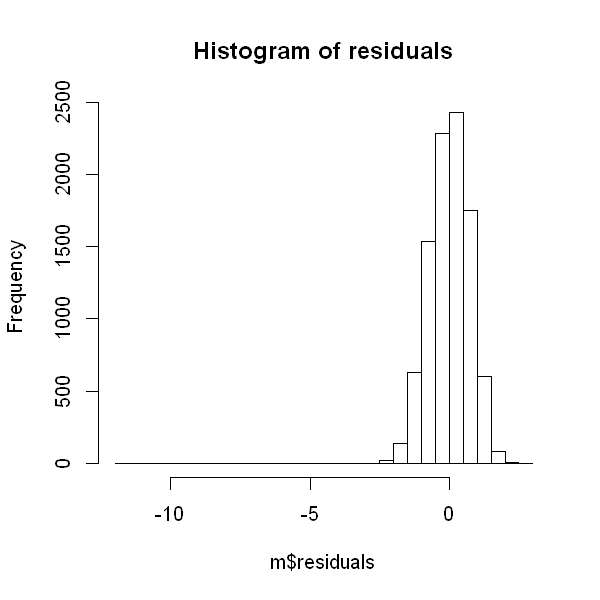

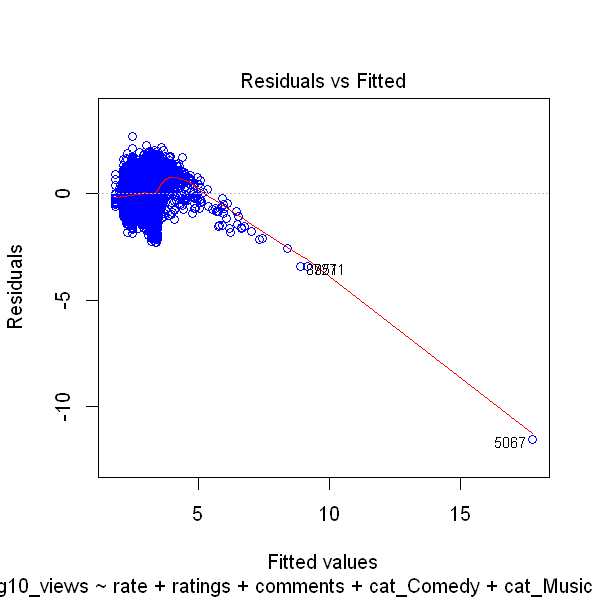

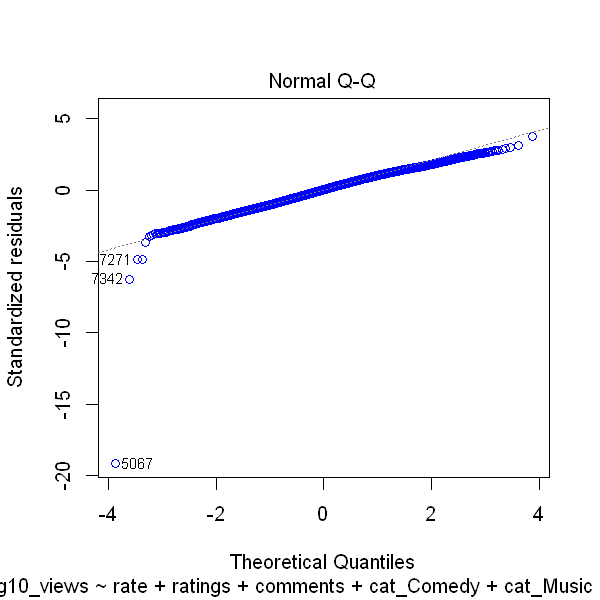

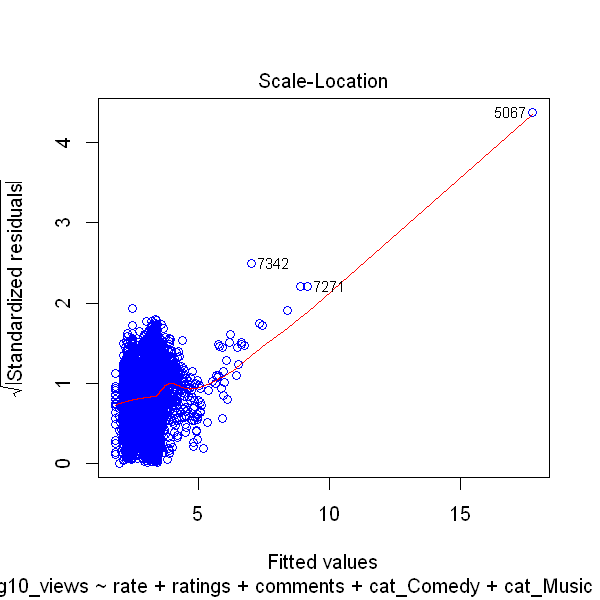

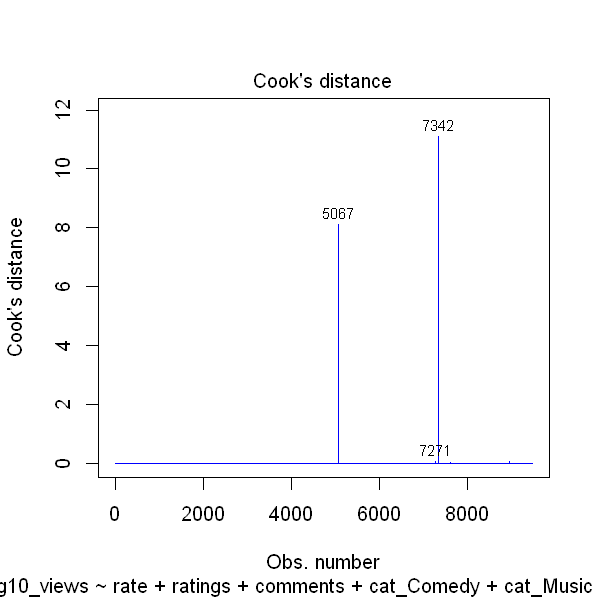

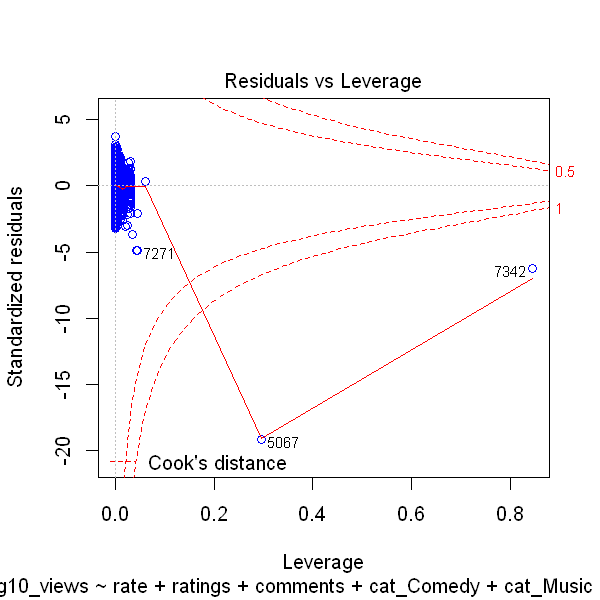

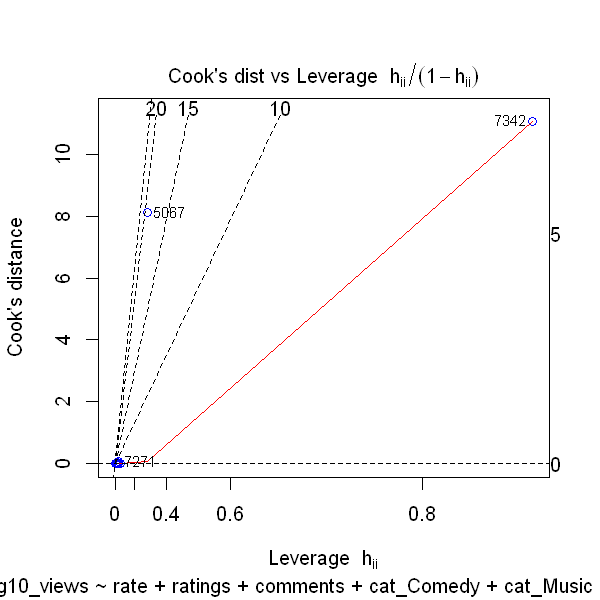

In [27]:
evaluate_model_shapiro = function(m) {
    paste("Shapiro test on residuals - test for normality (MLR 6)")
    # null hypothesis is residuals are normally distributed
    shapiro.test(m$residuals)
}

evaluate_model_bp = function(m) {
    paste("Breusch Pagan test - test for heteroskedasticity (MLR 5)")
    # null hypothesis is homoskedasticity, alt is presence of heteroskedasticity
    bptest(m)
}


evaluate_model_plots = function(m) {

    paste("Plotting residuals - test for normality of errors (MLR 6)")
    hist(m$residuals, breaks=50, main = "Histogram of residuals")

    paste("Diagnostic plots (MLR 4,5 - Residual vs fitted), (MLR6 - QQ Plot), (MLR5 - Std. Residuals), (Cooks Dist - Outliers test)")
    #par(mfrow=c(3,3))
    plot(m, which=1:6, col = 'blue')
    
}

summary(model$residuals)
dwtest(model)
# shapiro's test doesn't run for models with data more than 5k rows
# evaluate_model_shapiro(model)
evaluate_model_bp(model)
evaluate_model_plots(model)

We observe a few things about our model.

1. Residuals are normally distributed (MLR 6 - QQ plot + histogram of residuals)
2. Our residual vs fitted plot is heavily influenced by a few points, that is pulling the zero conditional mean line downward.
3. We have a few clear outliers with significant cook's distance values
4. We have heteroskedasticity as per the Breusch pagan test
5. We have ensured there's no perfect multicollinearity as per our EDA analysis and dwtest

Lets try and remove the outliers to re-assess our model

In [28]:
data[5059,]

,video_id,uploader,age,category,length,views,rate,ratings,comments,log10_views,...,cat_People_Blogs,cat_News_Politics,cat_Sports,cat_Film_Animation,cat_Gaming,cat_Science_Technology,cat_Autos_Vehicles,cat_Pets_Animals,cat_Nonprofits_Activism,cat_UNA
,<fct>,<fct>,<int>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5067,q2lo5aQeDgw,hakan222,779,Comedy,98,1807640,4.79,3801,1943,6.257112,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data[7333,]

,video_id,uploader,age,category,length,views,rate,ratings,comments,log10_views,...,cat_People_Blogs,cat_News_Politics,cat_Sports,cat_Film_Animation,cat_Gaming,cat_Science_Technology,cat_Autos_Vehicles,cat_Pets_Animals,cat_Nonprofits_Activism,cat_UNA
,<fct>,<fct>,<int>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7342,biH1VEgLwHA,Karcsi75,594,Music,120,188180,3.9,677,13211,5.274573,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# remove 1st outlier
data = data[-5059,]

In [31]:
# note that because we removed 1 row, all rows have shifted by 1 in the negative direction
# so the index 7333 now corresponds to index 7332
# we can confirm by comparing the 2 rows (for 7333 and 7332)
data[7332,]

,video_id,uploader,age,category,length,views,rate,ratings,comments,log10_views,...,cat_People_Blogs,cat_News_Politics,cat_Sports,cat_Film_Animation,cat_Gaming,cat_Science_Technology,cat_Autos_Vehicles,cat_Pets_Animals,cat_Nonprofits_Activism,cat_UNA
,<fct>,<fct>,<int>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7342,biH1VEgLwHA,Karcsi75,594,Music,120,188180,3.9,677,13211,5.274573,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# remove 2nd outlier
data = data[-7332,]

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-5.22035 -0.48207  0.03302  0.00000  0.51357  2.66835 


	studentized Breusch-Pagan test

data:  m
BP = 1677.5, df = 18, p-value < 2.2e-16


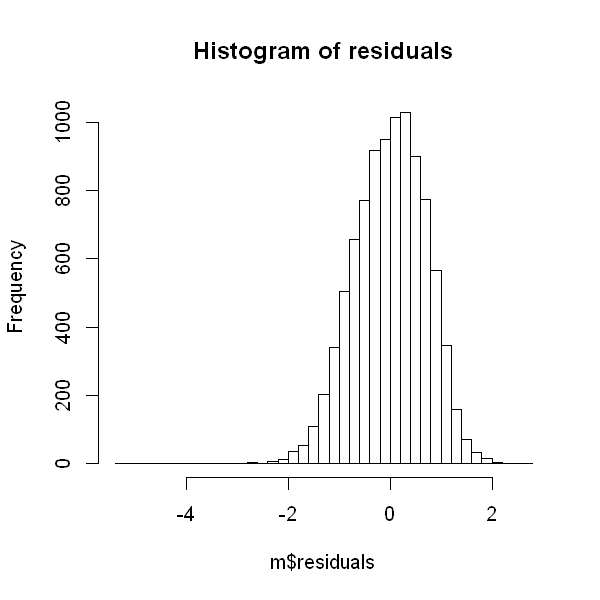

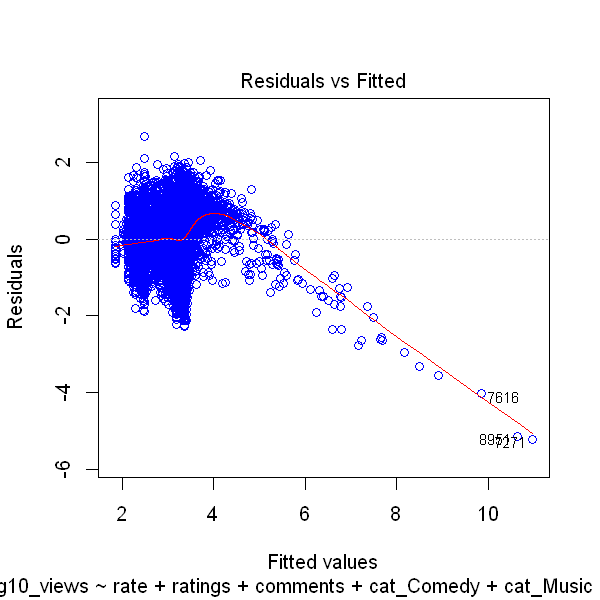

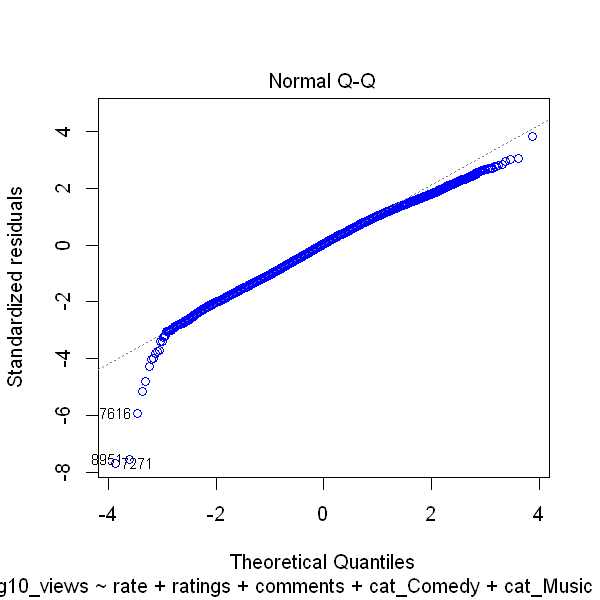

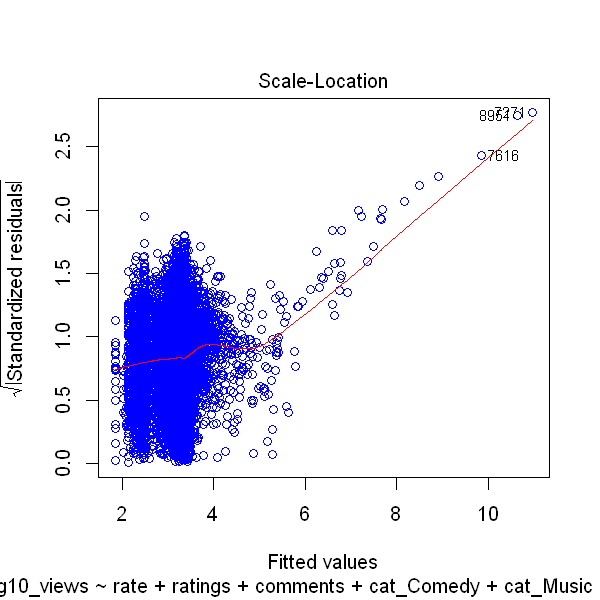

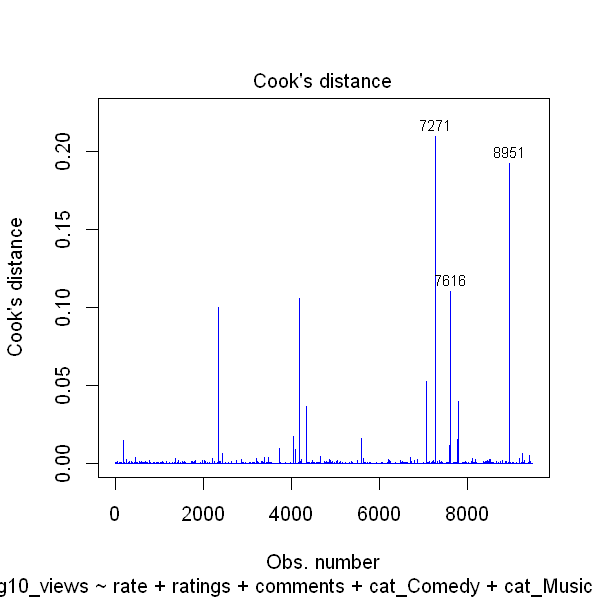

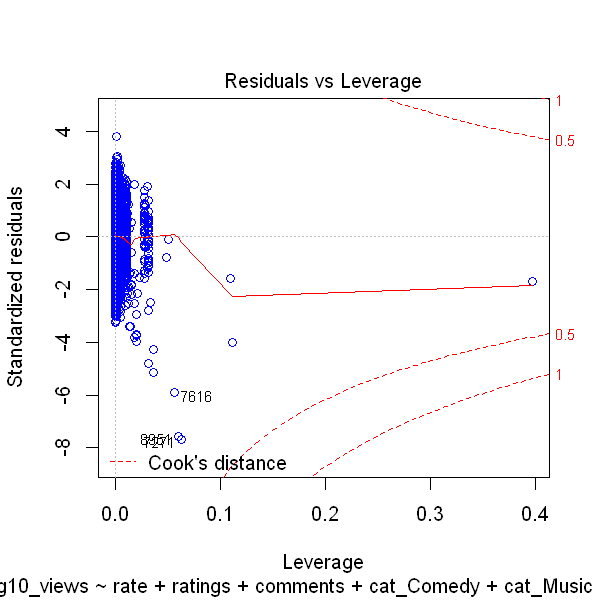

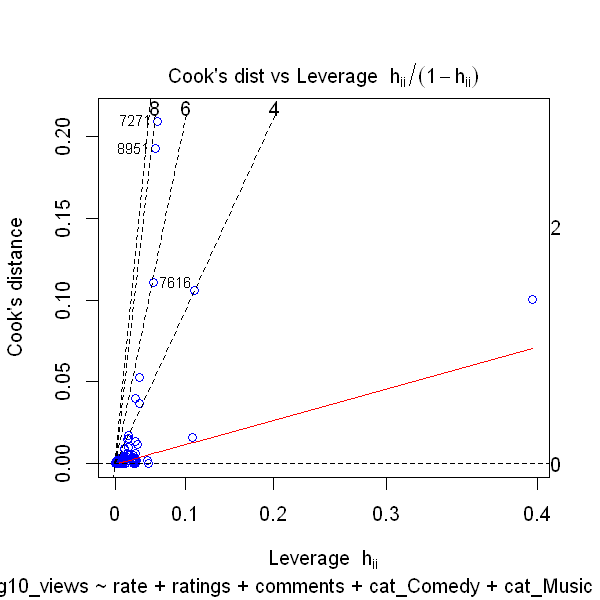

In [33]:
# re-run model
model = construct_model()

# re-evaluate results
# dwtest(model)
summary(model$residuals)
evaluate_model_bp(model)
evaluate_model_plots(model)

We observe now that we have gotten rid off our outlier rows, so the cooks distance for any row is no longer > 1.

However, this unfortunately doesn't change much for our diagnostics plots.

Normality of errors is still preserved (MLR 6). However, there is strong presence of heteroskedasticity (MLR 5 not satisfied). Zero conditional mean is also not satisfied (MLR 4).

MLR 1-3 are satisfied (linear in parameters, IID (making an assumption), no perfect multicollinearity)

**We can still deal with violation of MLR 5 by using White-Huber std errors.**

## Explain your result in terms of statistical and practical signiﬁcance

In [34]:
# Get heteroskedasticity robust std errors and coefficients
coeftest(model, vcov = vcovHC)
summary(model)
AIC(model)
BIC(model)


t test of coefficients:

                           Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)              3.06455994  0.14774265 20.7426 < 2.2e-16 ***
rate                     0.17436267  0.00438558 39.7582 < 2.2e-16 ***
ratings                  0.00479521  0.00053867  8.9020 < 2.2e-16 ***
comments                 0.00043690  0.00028331  1.5422 0.1230694    
cat_Comedy              -0.77739266  0.15025266 -5.1739 2.340e-07 ***
cat_Music               -0.58182497  0.14761895 -3.9414 8.159e-05 ***
cat_Entertainment       -0.58498109  0.14814333 -3.9488 7.913e-05 ***
cat_Howto_Style         -0.93429279  0.15064107 -6.2021 5.804e-10 ***
cat_Travel_Events       -0.53319548  0.15622845 -3.4129 0.0006454 ***
cat_Education           -0.83150706  0.15855069 -5.2444 1.602e-07 ***
cat_People_Blogs        -0.76309888  0.14990657 -5.0905 3.640e-07 ***
cat_News_Politics       -0.82827010  0.15200448 -5.4490 5.193e-08 ***
cat_Sports              -0.61330876  0.14951175 -4.1021 4.129e-0


Call:
lm(formula = log10_views ~ rate + ratings + comments + cat_Comedy + 
    cat_Music + cat_Entertainment + cat_Howto_Style + cat_Travel_Events + 
    cat_Education + cat_People_Blogs + cat_News_Politics + cat_Sports + 
    cat_Film_Animation + cat_Gaming + cat_Science_Technology + 
    cat_Autos_Vehicles + cat_Pets_Animals + cat_Nonprofits_Activism + 
    cat_UNA, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2203 -0.4821  0.0330  0.5136  2.6684 

Coefficients: (1 not defined because of singularities)
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.0645599  0.1188280  25.790  < 2e-16 ***
rate                     0.1743627  0.0041478  42.038  < 2e-16 ***
ratings                  0.0047952  0.0001573  30.480  < 2e-16 ***
comments                 0.0004369  0.0001304   3.351 0.000808 ***
cat_Comedy              -0.7773927  0.1209851  -6.426 1.38e-10 ***
cat_Music               -0.5818250  0.1184022  -4.914 9.07e-07 

[1] 20223.2

[1] 20366.33

Our performance for the model is not very satisfactory, with an adjusted R-Squared of 34% and very large AIC and BIC values.

**Its important to call out that almost all variables appear statistically significant in the model. This can be misleading because we have a very large number of samples.** As a result, we are bound to have statistical significance given that our coefficient variations would decrease and the expected values of betaj_hat will be centered around the population parameters (betaj) - relying on asymptotics.

The practical significance is as follows:
1. **rate** - Average user ratings have a positive effect on views percentage (since target is log10 views) - 1 unit increase in average ratings is associated with a 17% increase in views.
2. **ratings** - The number of users rating a video has a positive effect on views percentage. An additional user rating a video causes as 0.47% increase in views. This metric is significantly less than average ratings.
3. **comments** - The number of comments are not significant in determining number of views. This intuitively makes sense because users dont come to see a video because of comments. Users see a video, and reading / writing comments are a side-effect (after thought) of seeing the video.
4. **category** - The category has a negative effect in determining number of views. This result is a little harder to explain. The hypothesis was that some categories will attract more users than others (say "Music" and "Comedy" would attract higher number of users, than something niche like "Nonprofits") - but this doesnt seem to be the case.

## Identify 3 omitted variables and estimate whether they are biasing the eﬀect you measure towards zero or away from zero.

For the omitted variable bias, we need to consider our modified beta values:

betaj_hat = betaj_pop + beta_omitted * delta

where betaj_hat is off from the population betaj by a factor of beta_omitted * delta

The 3 identified omitted variables are:
1. streaming_resolution - the quality with which the video is streamed (240p vs 1080p) could severely impact how many times a video is watched.
2. viral_score - a score from 0 to 100 to capture its trend ranking in the search algorithm. If a video shows up frequently in search results, it will be watched more.
3. likes_ratio - the number of likes to dislikes ratio could also impact the views on a video.

Say if we measure each of the above omitted variables against "rate" - average rate score (since this variable has the highest impact on views from our regression):

**For streaming_resolution:**

1. beta for streaming_resolution is positive (higher streaming quality videos would have (all else equal) a higher viewership than lower streaming quality videos)
2. delta for streaming_resolution is positive (higher streaming quality videos would have (all else equal) a higher rating than lower streaming quality videos)

Hence, in the case of streaming_resolution, the effect of omission leads overestimating the effect of overestimating the coefficient of "rate". If streaming_resolution existed in our model, the rate variable would have less of an effect on viewership, and the coefficient would be drawn toward 0.  


**For viral_score:**

1. beta for viral_score is positive (highly viral videos will have higher viewership)
2. delta for viral_score is positive (highly viral videos would have (all else equal) a higher average rating)

Hence, in the case of viral_score, the effect of omission leads overestimating the effect of overestimating the coefficient of "rate". If viral_score existed in our model, the rate variable would have less of an effect on viewership, and the coefficient would be drawn toward 0.

**For likes_ratio:**

1. beta for likes_ratio is positive (higher liked videos will show up 1st in the search result, resulting in higher viewership)
2. delta for likes_ratio is positive (higher liked videos would have (all else equal) a higher average rating)

Hence, in the case of likes_ratio, the effect of omission leads overestimating the effect of overestimating the coefficient of "rate". If likes_ratio existed in our model, the rate variable would have less of an effect on viewership, and the coefficient would be drawn toward 0.